In [24]:
import requests
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
local_file = "auto2.csv"

response = requests.get(url)
if response.status_code == 200:
    with open(local_file, "wb") as file:
        file.write(response.content)
    print("File downloaded successfully.")
else:
    print("Failed to download file.")

# Load dataset



ConnectionError: HTTPSConnectionPool(host='cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud', port=443): Max retries exceeded with url: /IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001F01D8DDD10>: Failed to resolve 'cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud' ([Errno 11001] getaddrinfo failed)"))

In [ ]:
import pandas as pd
df=pd.read_csv("auto2.csv")

In [ ]:
df.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


**adding header to data**

In [ ]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns=headers
df.head()
df.to_csv("auto2.csv")

In [ ]:
df.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [ ]:
df['peak-rpm'].head()

0    5000.0
1    5000.0
2    5000.0
3    5500.0
4    5500.0
Name: peak-rpm, dtype: float64

In [ ]:
# Write your code below and press Shift+Enter to execute 
import pandas as pd 
import numpy as np 
path = "auto2.csv"
df=pd.read_csv(path)
print(df['peak-rpm'].dtypes)

float64


In [ ]:
#removing row where price is not defined
df.dropna(subset=['price'],axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)

# setting peak-rpm=avg of series where peak-rpm is not defined
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm']=df['peak-rpm'].replace(np.nan,avg_peakrpm,inplace=True)

# replacing avg_horsepower at place of nan in horsepower series
avg_horsepower=df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan,avg_horsepower,inplace=True)

# replacing value for bore columns
avg_bor=df['bore'].astype("float").mean(axis=0)
df['bore'].replace(np.nan,avg_bor)

#replacing value in normalized-losses column
avg_nor_loss=df['normalized-losses'].astype('float').mean(axis=0)
df['normalized-losses']=df['normalized-losses'].replace(np.nan,avg_nor_loss)


# editing stroke column
mean_value=df['stroke'].astype("float").mean(axis=0)
df['stroke']=df['stroke'].replace(np.nan,mean_value)


# editing no_of_doors column
df['num-of-doors'].value_counts()
df['num-of-doors'].value_counts().idxmax()
df['num-of-doors']=df['num-of-doors'].replace(np.nan,'four')





# saving file as csv with same name
df.to_csv("auto2.csv")

C:\Users\housh\AppData\Local\Temp\ipykernel_7296\608927889.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['peak-rpm']=df['peak-rpm'].replace(np.nan,avg_peakrpm,inplace=True)
C:\Users\housh\AppData\Local\Temp\ipykernel_7296\608927889.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [ ]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [ ]:
missing_data=df.notnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

normalized-losses
normalized-losses
True    201
Name: count, dtype: int64

make
make
True    201
Name: count, dtype: int64

fuel-type
fuel-type
True    201
Name: count, dtype: int64

aspiration
aspiration
True    201
Name: count, dtype: int64

num-of-doors
num-of-doors
True    201
Name: count, dtype: int64

body-style
body-style
True    201
Name: count, dtype: int64

drive-wheels
drive-wheels
True    201
Name: count, dtype: int64

engine-location
engine-location
True    201
Name: count, dtype: int64

wheel-base
wheel-base
True    201
Name: count, dtype: int64

length
length
True    201
Name: count, dtype: int64

width
width
True    201
Name: count, dtype: int64

height
height
True    201
Name: count, dtype: int64

curb-weight
curb-weight
True    201
Name: count, dtype: int64

engine-type
engine-type
True    201
Name: count, dtype: int64

num-of-cylinders
num-of-cylinders
True    201
Name: count, dtype: int64

engine-size
engine-size
True    201
Name: count, dtype: int64

fuel-system
fu

In [ ]:
# import pandas as pd
# # to delete cell from the dataframe
# df = pd.read_csv("auto.csv", index_col=0)  # Removes "Unnamed: 0" if it's an index
# df.to_csv("auto.csv", index=False)  # Save without the index
# df.head()
# df.to_csv("auto2.csv")

In [ ]:
df[['bore','stroke','compression-ratio','horsepower']].dtypes

bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
dtype: object

In [ ]:
df[['bore','stroke','compression-ratio','horsepower']]=df[['bore','stroke','compression-ratio','horsepower']].astype('float')
correlation=df[['bore','stroke','compression-ratio','horsepower']].corr()
print(correlation)

                       bore    stroke  compression-ratio  horsepower
bore               1.000000 -0.055390           0.001250    0.567875
stroke            -0.055390  1.000000           0.187854    0.097815
compression-ratio  0.001250  0.187854           1.000000   -0.214431
horsepower         0.567875  0.097815          -0.214431    1.000000


(0.0, 53510.783838594725)

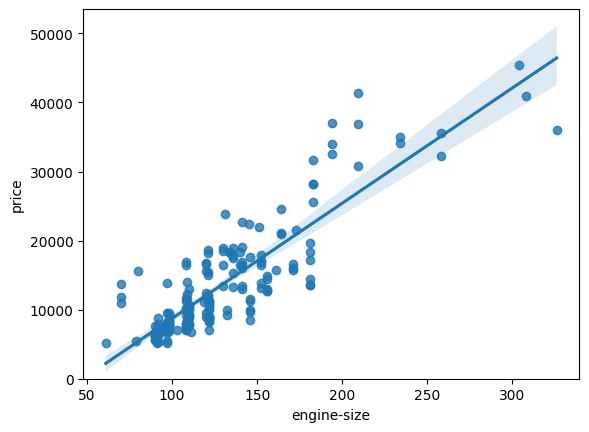

In [ ]:
# Engine size as potential predictor variable of price
from matplotlib import pyplot as plt
import seaborn as sns 
sns.regplot(x='engine-size',y='price',data=df)
plt.ylim(0,)

In [ ]:
df[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<Axes: xlabel='highway-mpg', ylabel='price'>

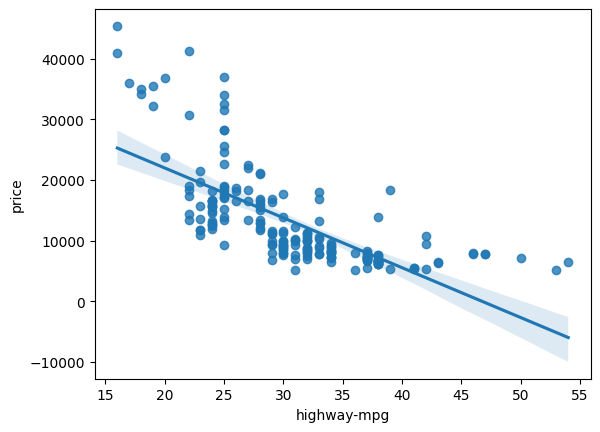

In [ ]:
sns.regplot(x='highway-mpg',y='price',data=df)

In [ ]:
df[['highway-mpg','price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<Axes: xlabel='peak-rpm', ylabel='price'>

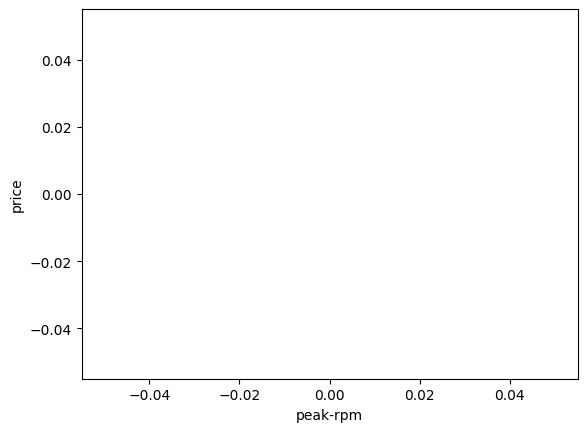

In [ ]:
sns.regplot(x='peak-rpm',y='price',data=df)

In [ ]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,NaN,NaN
price,NaN,1.0


In [ ]:
df[['stroke','price']].corr()

,stroke,price
stroke,1.000000,0.082267
price,0.082267,1.000000


<Axes: xlabel='stroke', ylabel='price'>

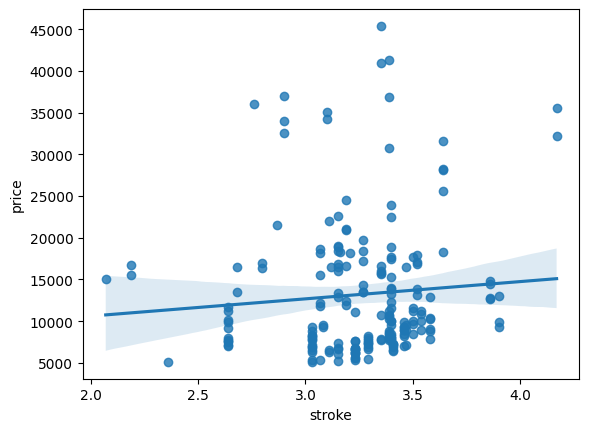

In [ ]:
sns.regplot(x='stroke',y='price',data=df)


<Axes: xlabel='body-style', ylabel='price'>

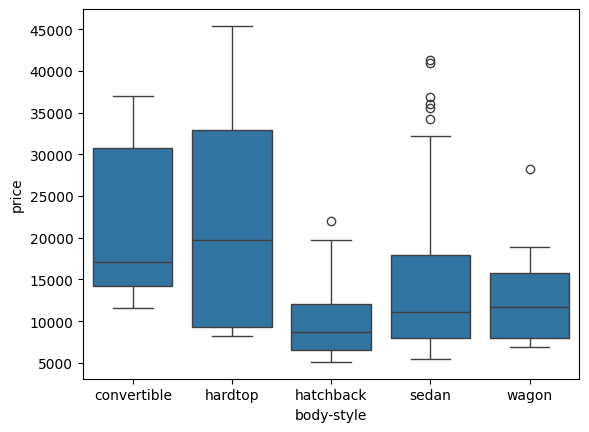

In [ ]:
df = df.reset_index(drop=True)
df['body-style'] = df['body-style'].astype('category')
sns.boxplot(x='body-style',y='price',data=df)

<Axes: xlabel='engine-location', ylabel='price'>

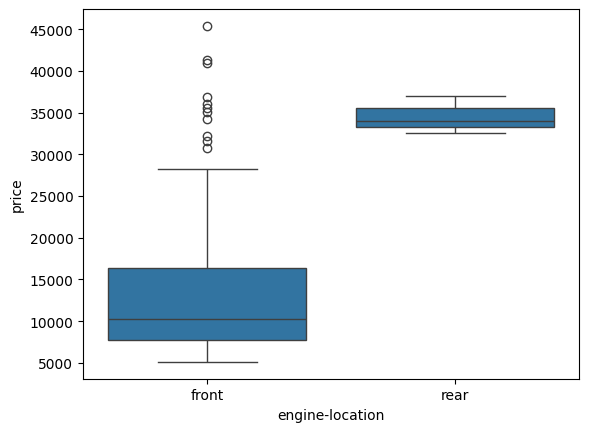

In [ ]:
sns.boxplot(x='engine-location',y='price',data=df)

<Axes: xlabel='drive-wheels', ylabel='price'>

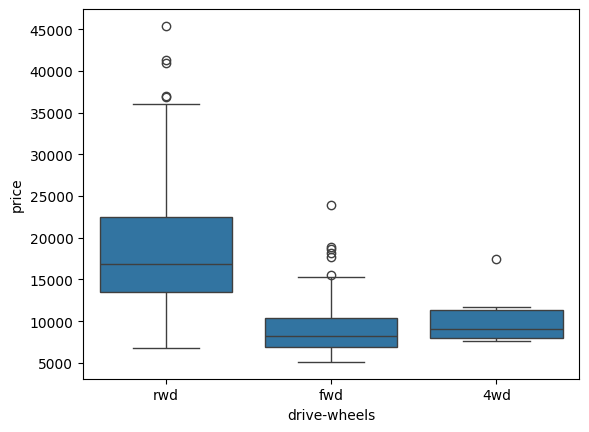

In [ ]:
sns.boxplot(x='drive-wheels',y='price',data=df)

In [ ]:
df.describe()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df.describe(include=['object'])

,make,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,205,205,205,203,205,205,205,205,205
unique,22,2,2,2,3,2,7,7,8
top,toyota,gas,std,four,fwd,front,ohc,four,mpfi
freq,32,185,168,114,120,202,148,159,94


**value counts** <br>
only work on python series and not on data frame <br>
way to understand how many units of each characteristic/variable we have

In [ ]:
df["drive-wheels"].value_counts()

drive-wheels
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

In [ ]:
df['drive-wheels'].value_counts().to_frame()

,count
drive-wheels,
fwd,120
rwd,76
4wd,9


In [ ]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,count
drive-wheels,
fwd,120
rwd,76
4wd,9


In [ ]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,count
drive-wheels,
fwd,120
rwd,76
4wd,9


In [ ]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,count
engine-location,
front,202
rear,3


In [ ]:
drive_wheels_counts.index.name='drive-wheels'
drive_wheels_counts

,count
drive-wheels,
fwd,120
rwd,76
4wd,9


In [ ]:
df.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [ ]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,count
engine-location,
front,202
rear,3


In [ ]:
print(df['drive-wheels'].unique())

['rwd' 'fwd' '4wd']


In [ ]:
df_group_one=df[['drive-wheels','body-style','price']]
print(df_group_one)

    drive-wheels   body-style    price
0            rwd  convertible  13495.0
1            rwd  convertible  16500.0
2            rwd    hatchback  16500.0
3            fwd        sedan  13950.0
4            4wd        sedan  17450.0
..           ...          ...      ...
200          rwd        sedan  16845.0
201          rwd        sedan  19045.0
202          rwd        sedan  21485.0
203          rwd        sedan  22470.0
204          rwd        sedan  22625.0

[205 rows x 3 columns]


In [26]:
df_group_one=df[['drive-wheels','body-style','price']].dtypes
print(df_group_one)


drive-wheels     object
body-style       object
price           float64
dtype: object


In [27]:
df['price']=df['price'].replace("?",np.nan)

#convert price to numeric
df['price']=pd.to_numeric(df['price'],errors='coerce')

print(df[['drive-wheels','body-style','price']].dtypes)

#group by 'drive-wheels' and 'body-style',then calculate the mean
df_avg_price=df.groupby(['drive-wheels','body-style'],as_index=False)['price'].mean()
print(df_avg_price)




drive-wheels     object
body-style       object
price           float64
dtype: object
   drive-wheels   body-style         price
0           4wd    hatchback   7603.000000
1           4wd        sedan  12647.333333
2           4wd        wagon   9095.750000
3           fwd  convertible  11595.000000
4           fwd      hardtop   8249.000000
5           fwd    hatchback   8396.387755
6           fwd        sedan   9811.800000
7           fwd        wagon   9997.333333
8           rwd  convertible  23949.600000
9           rwd      hardtop  24202.714286
10          rwd    hatchback  14337.777778
11          rwd        sedan  21711.833333
12          rwd        wagon  16994.222222


In [31]:
df_gptest=df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False)['price'].mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [32]:
grouped_pivot= grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [33]:
grouped_pivot=grouped_pivot.fillna(0)
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [37]:
#using groupby function to find the average 'price' of each car based on "body-style"
df_grptest2=df[['body-style','price']]
grouped_test_bodystyle = df_grptest2.groupby(['body-style'],as_index=False)['price'].mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

using heatmap to visualize the relationship between body style vs price

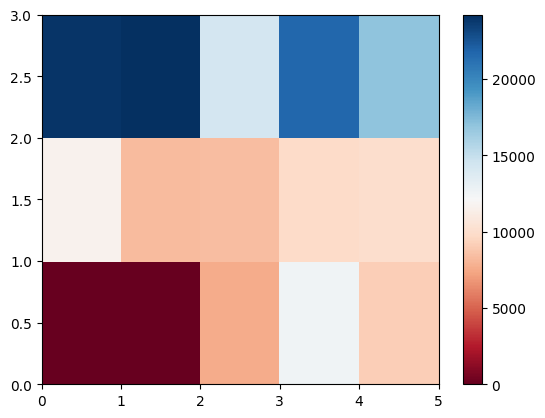

In [42]:
#using the grouped results
plt.pcolor(grouped_pivot,cmap='RdBu')
plt.colorbar()
plt.show()

C:\Users\housh\AppData\Local\Temp\ipykernel_7296\3204826942.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(row_labels, minor=False)
C:\Users\housh\AppData\Local\Temp\ipykernel_7296\3204826942.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(col_labels, minor=False)


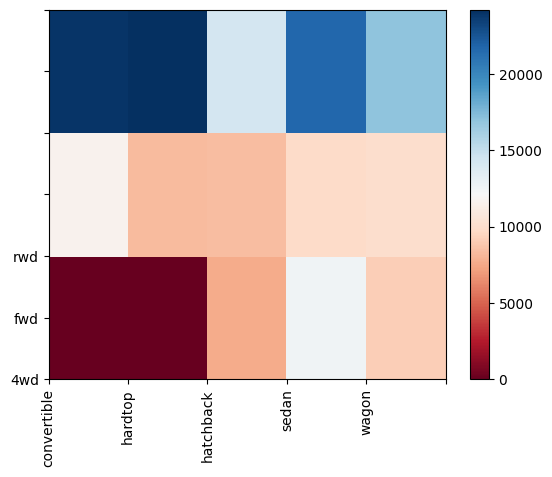

In [ ]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [46]:
from scipy import stats

**Wheel-base vs. price**

In [47]:
import pandas as pd
import numpy as np
df=pd.read_csv("auto2.csv")
df["price"] = df["price"].replace("?",np.nan)
pearson_coef,p_value = stats.pearsonr(df['wheel-base'],df['price'])
print('the pearson correlation coefficient is', pearson_coef, "with a p-value of P =",p_value)

the pearson correlation coefficient is 0.5846418222655081 with a p-value of P = 8.076488270732847e-20


In [48]:
pearson_coef,p_value = stats.pearsonr(df['horsepower'],df['price'])
print(f"the pearson correlation is {pearson_coef} \nP-value is {p_value}")

the pearson correlation is 0.8096811975632285 
P-value is 6.058444649710644e-48


In [50]:
pearson_coef,p_value=stats.pearsonr(df['length'],df['price'])
print(f"pearson correlation is {pearson_coef} \np-value is {p_value}")

pearson correlation is 0.6906283804483642 
p-value is 8.016477466158899e-30


In [51]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522674  with a P-value of P = 9.200335510481227e-38


In [52]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702845  with a P-value of P =  2.189577238893924e-53


In [53]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.26549162219869e-64


In [54]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is nan  with a P-value of P =   nan


In [55]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844679  with a P-value of P =  2.3211320655675065e-29


In [56]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.7046922650589529  with a P-value of P =  1.7495471144476634e-31


<t>**ANOVA**: Analysis of Variance</t><br>
The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

**F-test score**: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

**P-value**: P-value tells how statistically significant our calculated score value is.

If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.

In [57]:
grouped_test2 = df_gptest[['drive-wheels','price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


We can obtain the values of the method group using the method "get_group".


In [58]:
grouped_test2.get_group('4wd')['price']

C:\Users\housh\AppData\Local\Temp\ipykernel_7296\4164424613.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  grouped_test2.get_group('4wd')['price']


4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

We can use the function 'f_oneway' in the module 'stats' to obtain the <b>F-test score</b> and <b>P-value</b>.


In [60]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price']) 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577149576e-23


C:\Users\housh\AppData\Local\Temp\ipykernel_7296\4289973415.py:2: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])


In [ ]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677366e-23


C:\Users\housh\AppData\Local\Temp\ipykernel_7296\1567334666.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])


In [62]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225367


C:\Users\housh\AppData\Local\Temp\ipykernel_7296\2652814633.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])


In [63]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.665465750252303 , P = 0.4162011669784502


C:\Users\housh\AppData\Local\Temp\ipykernel_7296\1015518057.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])


---
---

<i>Module 4</i>

importing module for linear regression<br>
and creating variable lm

In [73]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

now using "highway-mpg" as X and "price" as Y to create a liner function

In [74]:
X = df[["highway-mpg"]]
Y = df["price"]

fit the linear model using highway-mpg

In [76]:
lm.fit(X,Y)

LinearRegression()

output the prediction

In [77]:
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

getting value of **intercept(a)**

In [78]:
lm.intercept_

np.float64(38423.3058581574)

getting the value of **slop(b)**

In [79]:
lm.coef_

array([-821.73337832])

**final estimated linear model** we get is: <br>
price = 38423.3058 -821.73 X highway-mpg

---

**multiple-linear regression**<br>
this method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables

$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$


In [81]:
z = df[['horsepower','curb-weight','engine-size','highway-mpg']]
lm.fit(z,df['price'])
lm.intercept_

np.float64(-15824.038208234473)

In [82]:
lm.coef_


array([53.61042729,  4.70886444, 81.47225667, 36.39637823])

<b>Price</b> = -15806.62462632918 + 53.49574423 x <b>horsepower</b> + 4.70770099 x <b>curb-weight</b> + 81.53026382 x <b>engine-size</b> + 36.05748882 x <b>highway-mpg</b>


---


**now using seaborn to visualize our model**

In [83]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

*Regression plot*

(0.0, 48182.49975963221)

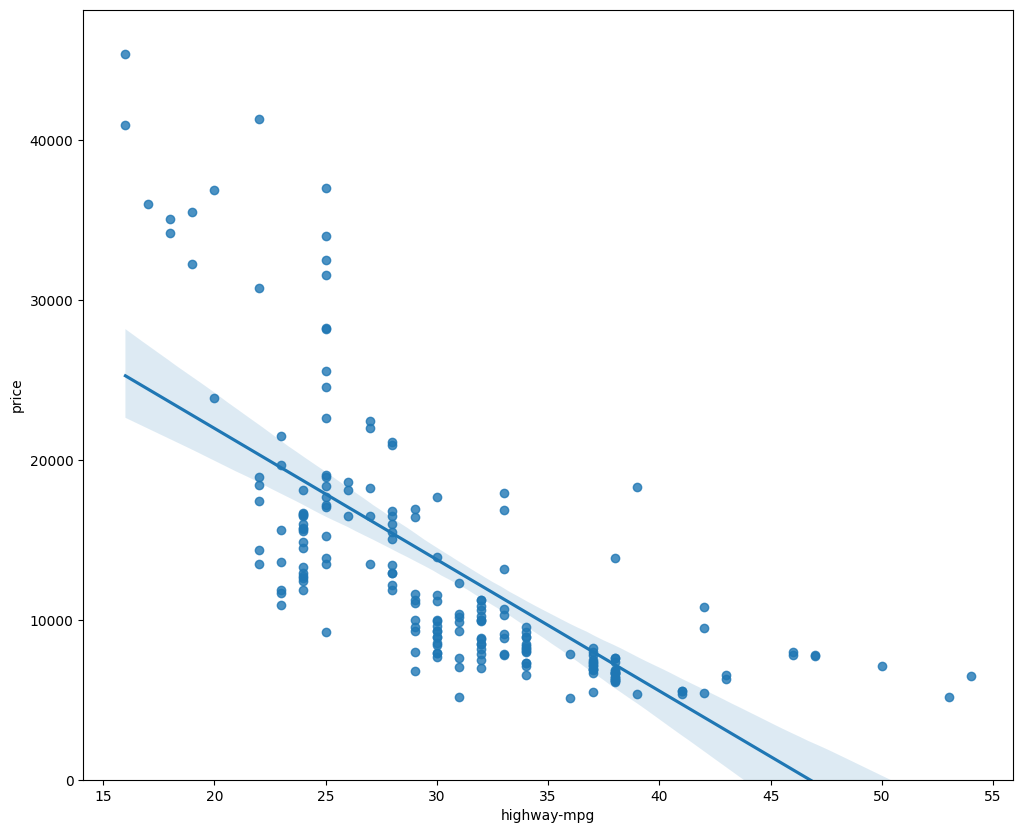

In [84]:
width = 12
height = 10
plt.figure(figsize=(width,height))
sns.regplot(x='highway-mpg',y='price',data=df)
plt.ylim(0,)

<p>We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.

Let's compare this plot to the regression plot of "peak-rpm".</p>


(0.0, 0.05500000000000001)

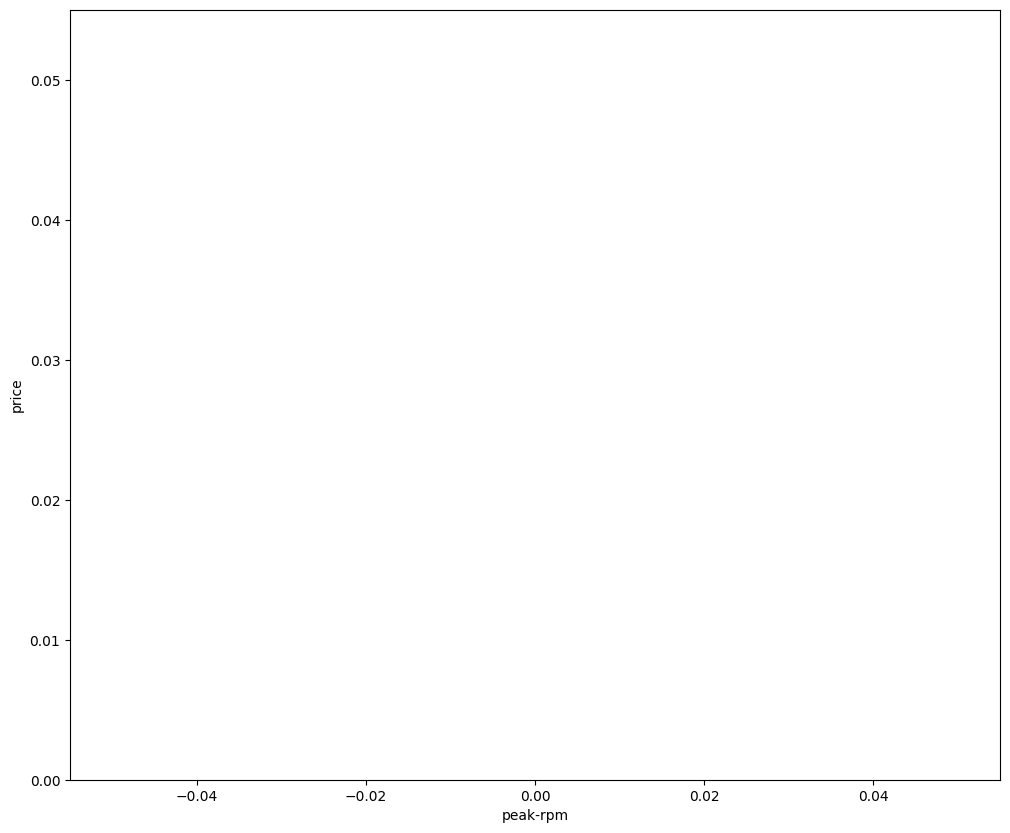

In [88]:
plt.figure(figsize=(width,height))
sns.regplot(x="peak-rpm",y='price',data=df)
plt.ylim(0,)

---


*Residual  plot*

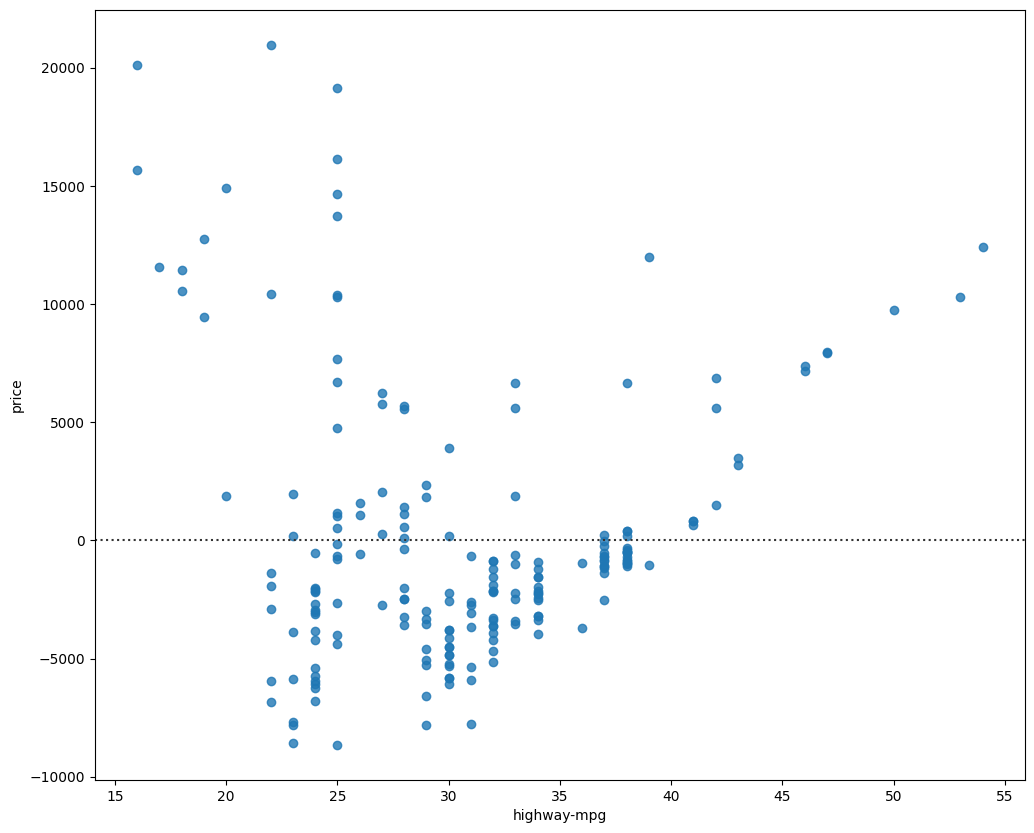

In [90]:
width = 12
height = 10
plt.figure(figsize=(width,height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

*maltiple Linear Regression*

C:\Users\housh\AppData\Local\Temp\ipykernel_7296\3759717786.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\housh\AppData\Local\Temp\ipykernel_7296\3759717786.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

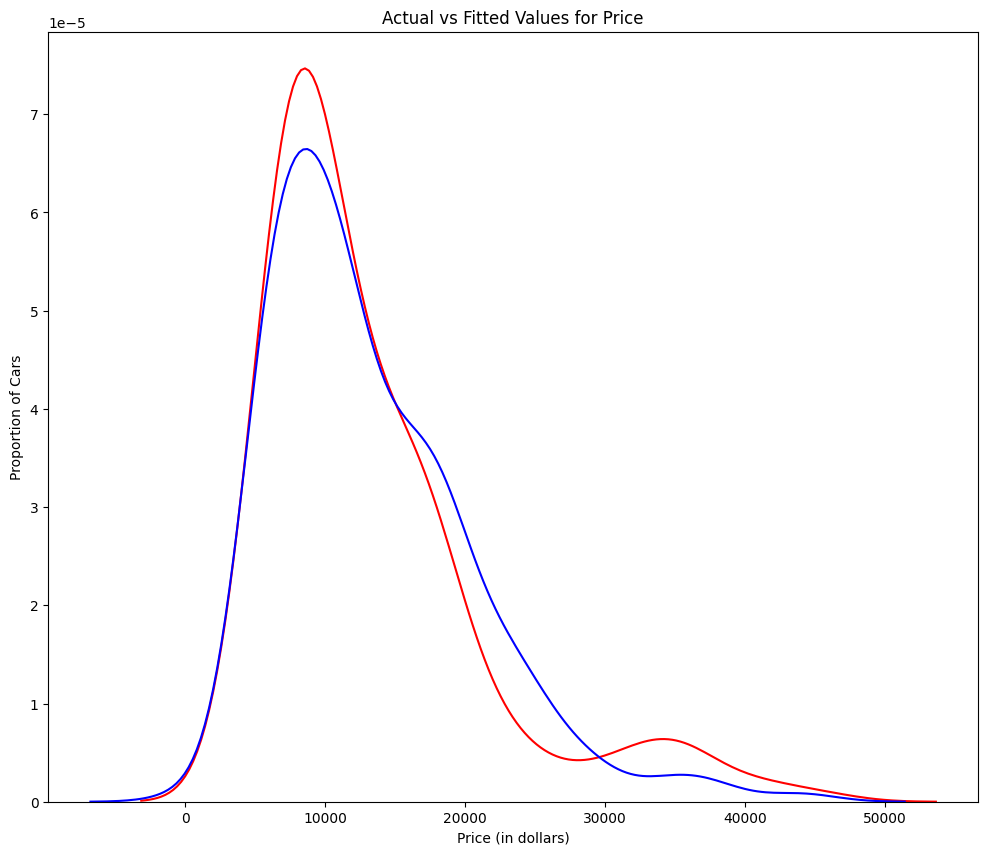

In [93]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y_hat = lm.predict(Z)


plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

*polynomial regression*

In [95]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    # plt.close()

In [97]:
#get the variables
x = df['highway-mpg']
y = df['price']

Let's fit the polynomial using the function <b>polyfit</b>, then use the function <b>poly1d</b> to display the polynomial function.


In [98]:
# Here we use a polynomial of the 3rd order
f = np.polyfit(x,y,3)
p =  np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


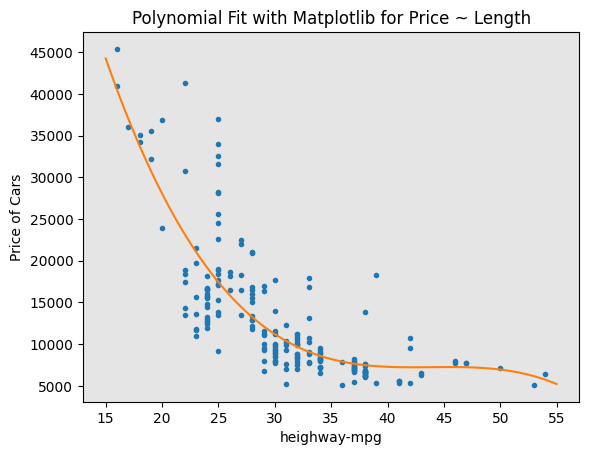

In [99]:
#ploting the function
PlotPolly(p,x,y,'heighway-mpg')

In [100]:
np.polyfit(x,y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


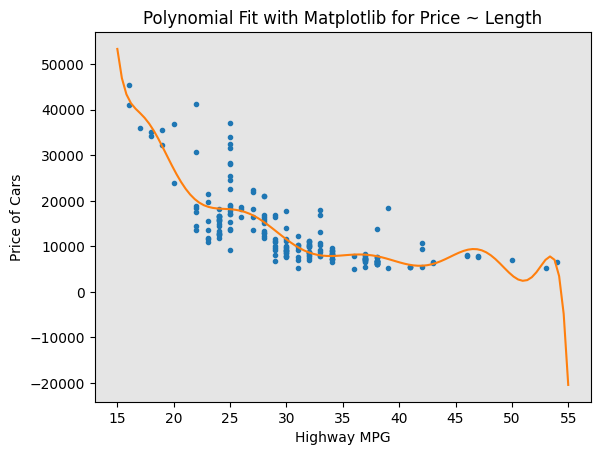

In [101]:
# Here we use a polynomial of the 11rd order (cubic) 
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

*polynomial transformation*

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
#creating polynomialFeatures object of degree 2
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [103]:
z_pr = pr.fit_transform(Z)

before transformation

In [104]:
z.shape

(201, 4)

after transformation

In [105]:
z_pr.shape

(201, 15)

---

***<h>Pipeline</h>***<br>
Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [106]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [108]:
# We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [109]:
#input the list as an argument to the pipeline constructor
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

Then, we can normalize the data, perform a transform and fit the model simultaneously.

In [110]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously.

In [111]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13103.37745014, 13103.37745014, 18228.50045451, 10392.95563313])

Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.

In [112]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.00138847, 13699.00138847, 19055.18075089, 10621.20889105,
       15519.94133137, 13868.36830279, 15455.25561838, 15973.23070656,
       17613.77045652, 10722.84396625])

---


**Measures for in-sample evaluation**

*model 1*

*calculation of R^2*

In [114]:
#highway_mpg_fit
lm.fit(X,Y)
# find the R^2
print("the R-square is: ",lm.score(X,Y))

the R-square is:  0.4965911884339176


*calculate the MSE*

In [115]:
Yhat=lm.predict(X)
print('the output of the first four predicted value is: ',Yhat[0:4])

the output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [117]:
from sklearn.metrics import mean_squared_error 
mse = mean_squared_error(df['price'],Yhat)
print('the mean square error of price and predicted value is: ',mse)

the mean square error of price and predicted value is:  31635042.944639888


**model 2**<br>
*multiple linear regression*

In [118]:
# calculating r^2


lm.fit(Z,df['price'])
#find the r-squared
print('the R-squared value is: ',lm.score(Z,df['price']))

the R-squared value is:  0.8094130135602672


In [121]:
# calculating MSE

#producing a prediction
Y_predict_multifit =lm.predict(Z)
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11976801.681229597


**Model 3**<br>
*Polynomial Fit*

In [122]:
# calculating R-squared

from sklearn.metrics import r2_score

# applying function
r_squared=r2_score(y,p(x))
print("the R-square value is: ",r_squared)

the R-square value is:  0.674194666390652


In [123]:
# calculation MSE

mean_squared_error(df['price'],p(x))

20474146.426361207

---

**Prediction**

In [124]:
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline

In [125]:
new_input=np.arange(1,100,1).reshape(-1,1)

In [126]:
lm.fit(X,Y)
lm

LinearRegression()

In [127]:
Yhat=lm.predict(new_input)
Yhat[0:5]

C:\Users\housh\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

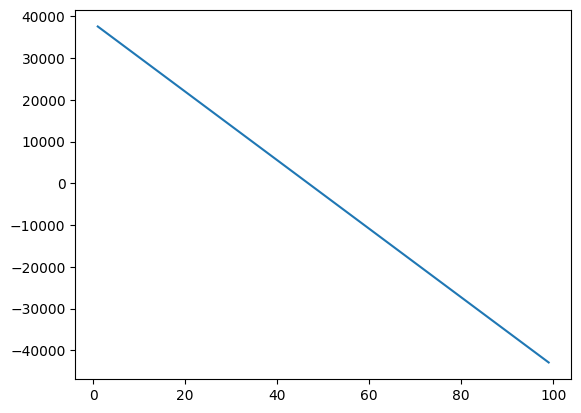

In [128]:
plt.plot(new_input,Yhat)
plt.show()

<h3>Decision Making: Determining a Good Model Fit</h3>


<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>

<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>

<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>

<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>


<h3>Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)</h3>


<p>Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the MSE and R^2.</p>

<p>In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.
<ul>
    <li><b>MSE</b>: The MSE of SLR is  3.16x10^7  while MLR has an MSE of 1.2 x10^7.  The MSE of MLR is much smaller.</li>
    <li><b>R-squared</b>: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).</li>
</ul>
</p>

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.


<h3>Simple Linear Model (SLR) vs. Polynomial Fit</h3>



<ul>
    <li><b>MSE</b>: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.</li> 
    <li><b>R-squared</b>: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.</li>
</ul>
<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.</p>


<h3>Multiple Linear Regression (MLR) vs. Polynomial Fit</h3>


<ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.</li>
</ul>
